In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import time
from datetime import datetime
from numpy.random import seed
seed(1) # Fixing random seed for reproducibility

Loading Data and Image Processing

In [2]:
# dimensions of our images
img_width, img_height = 500, 500

# Relative directory paths
train_data_dir = 'C:/Users/revap/Desktop/Data/train'
validation_data_dir = 'C:/Users/revap/Desktop/Data/valid'

#Check for image format
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

#Rescale all images for training & Apply data augmentation for better training performance
train_datagen = ImageDataGenerator(
    # horizontal_flip=True,
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2)

#Rescale my images for voldiation. Data augementation should not be applied to validation dataset
test_datagen = ImageDataGenerator(rescale=1. / 255)

batch_size = 32
#Generate the scaling and data augmentation to the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

#Generate the scaling to the test dataset
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


Model Architecture

In [3]:
#Develop the CNN Architecture

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))

model.add(Dense(3, activation='softmax'))


In [ ]:
#Compile model with loss function, optimizer, and target metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

: 

Model Training

In [ ]:
#Training & Validation dataset sizes
nb_train_samples = 256
nb_validation_samples = 160

#Model hyperparameter
epochs = 10

#Attain summary of the model
model.summary()

#Training the Neural Network Architecture (Need to define the "model" when creating the architecture)
history = model.fit(
          train_generator, #Uses the augmented train data generated
          steps_per_epoch = nb_train_samples // batch_size, #Training steps taken per epoch
          epochs = epochs, #Total number of epochs defined
          validation_data = validation_generator, #Uses the scaled validation data
          validation_steps = nb_validation_samples // batch_size) #Validation steps taken per epoch


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 64)       0

In [ ]:
#Save model (Saves Architecture and Weights)
model.save('/content/gdrive/MyDrive/Colab Notebooks/Data/saved_trained_models/trained_model_{0}.h5'.format(datetime.today().strftime("%Y-%m-%d")))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Plotting Performance: Accuracy and Loss of Trainning and Validation

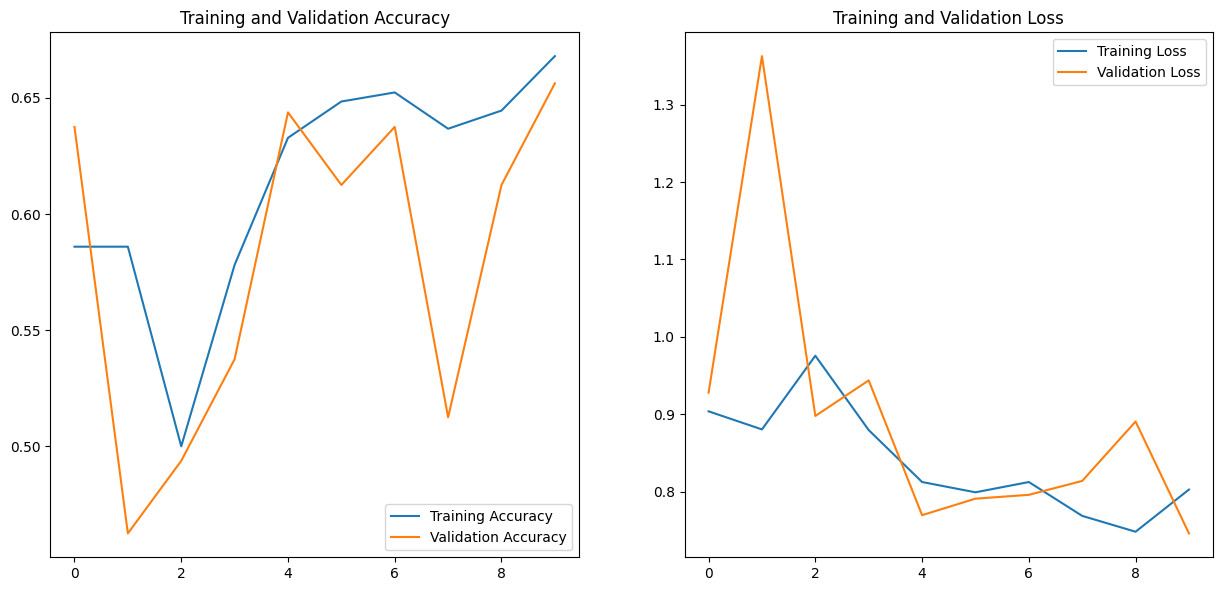

In [ ]:
#Extract the accuracy and loss for both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()